#Tala Kafafi    0197035
#Ayah Khawaldeh 0181117

In [648]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import os 

In [649]:
pwd = os.getcwd()
filepath=os.path.join(pwd , 'D:\c element\Loan Dataset 1.csv')
filepath
loan_data=pd.read_csv(filepath)
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [650]:
#Check for duplicates
loan_data.duplicated().sum()


0

In [651]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [652]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [653]:
loan_data.shape


(614, 13)

In [654]:
loan_data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [655]:
loan_data["totalIncome"] = (loan_data["ApplicantIncome"] + loan_data["CoapplicantIncome"])
del loan_data['ApplicantIncome']
del loan_data['CoapplicantIncome']

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


# visualize the datasets


In [656]:
#Gender
value=loan_data['Gender'].value_counts()
print(value)

Male      489
Female    112
Name: Gender, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

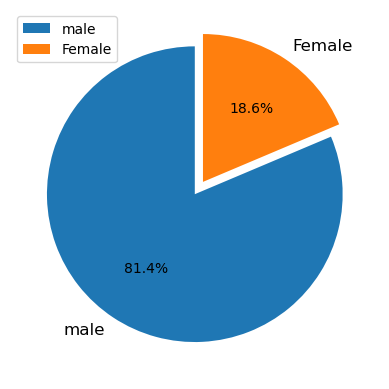

In [657]:
import matplotlib.pyplot as plt
value=loan_data['Gender'].value_counts()

a=['male','Female']
plt.pie(value , labels=a , autopct='%1.1f%%', startangle=90 , explode=(0, .1))
plt.legend()
plt.show

Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:>

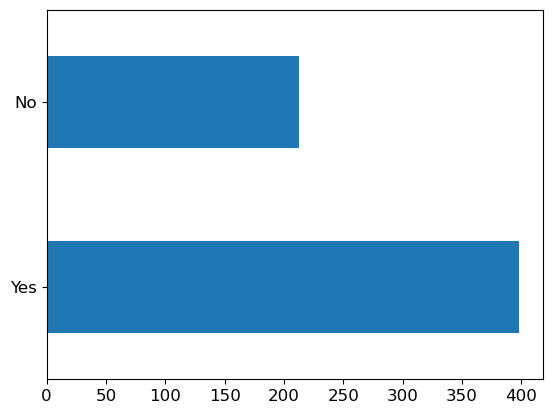

In [658]:
status=loan_data['Married'].value_counts()
print(status)
status.plot(kind='barh')

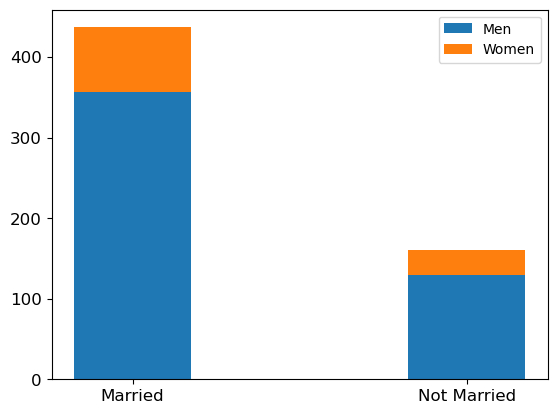

In [659]:

G=loan_data.groupby('Gender')
F=G.get_group('Female').Married.value_counts()

M=G.get_group('Male').Married.value_counts()


labels = ['Married', 'Not Married']
men = M
women = F



width = 0.35 # the width of the bars: can also be len(x)

fig, ax = plt.subplots()
ax.bar(labels, men, width,  label='Men')
ax.bar(labels, women, width,bottom=men, label='Women')

ax.legend()
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:>

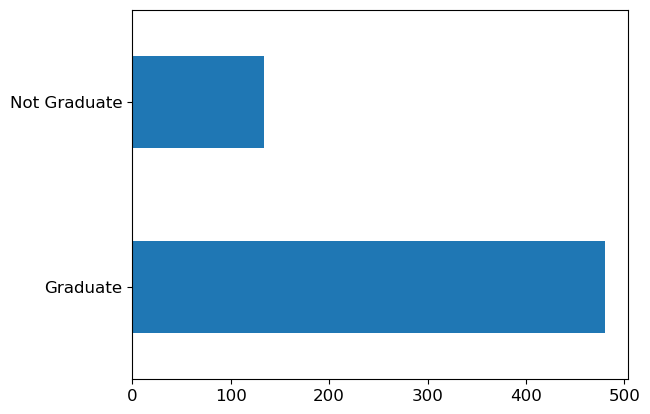

In [660]:
#Education
status=loan_data['Education'].value_counts()
print(status)
status.plot(kind='barh')

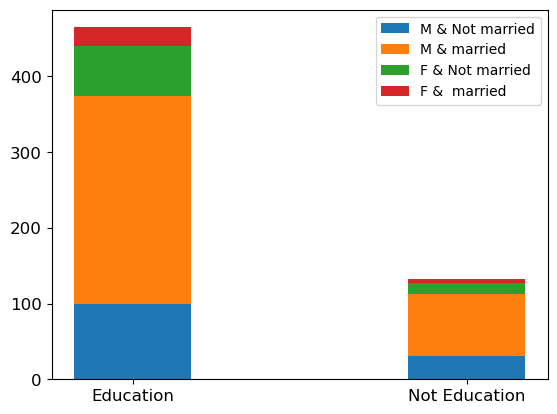

In [661]:

case1=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'No') ].Education.value_counts()
case2=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'Yes') ].Education.value_counts()
case3=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'No') ].Education.value_counts()
case4=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'Yes') ].Education.value_counts()

labels = ['Education', 'Not Education']


width = 0.35 # the width of the bars: can also be len(x)

fig, ax = plt.subplots()
ax.bar(labels, case1, width,  label='M & Not married')
ax.bar(labels,case2, width,bottom = case1 ,label='M & married')
ax.bar(labels, case3, width, bottom= case2+case1, label='F & Not married')
ax.bar(labels, case4, width,bottom=case3+case2+case1 ,label='F &  married')
#plt.axis([0,4,0,800])
ax.legend()
plt.show()


No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:>

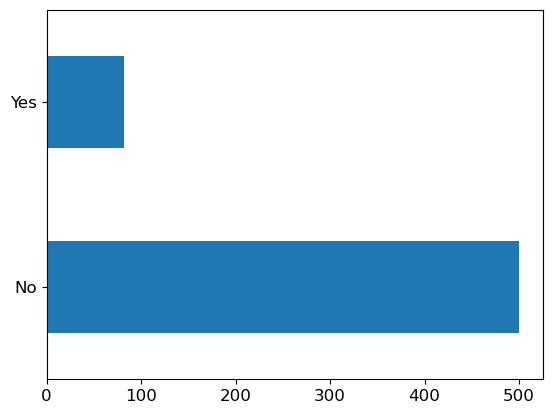

In [662]:
#Self_Employed
status=loan_data['Self_Employed'].value_counts()
print(status)
status.plot(kind='barh')

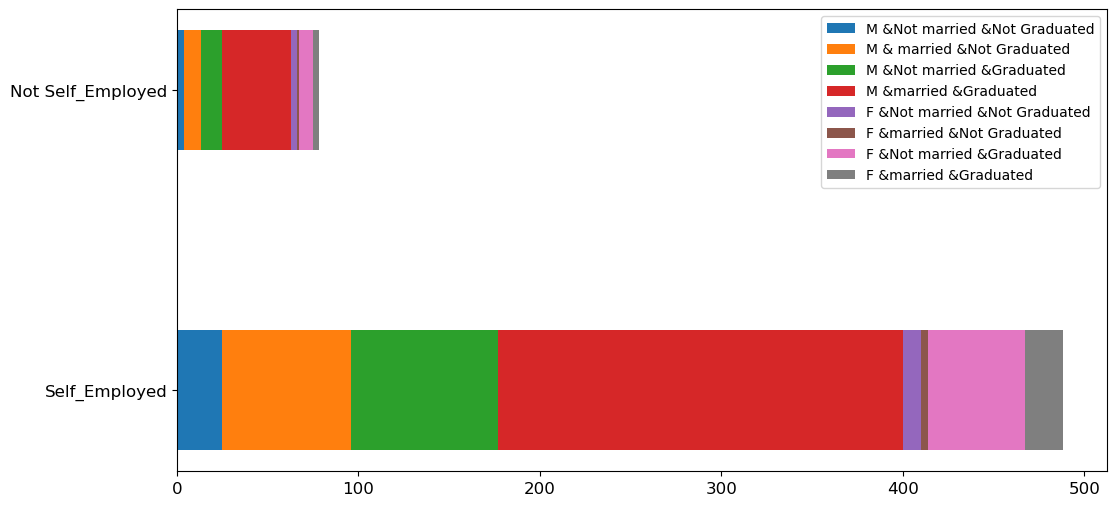

In [663]:

case1=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'No') &(loan_data ["Education"]== 'Not Graduate') ].Self_Employed.value_counts()
case2=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'Yes') &(loan_data ["Education"]== 'Not Graduate') ].Self_Employed.value_counts()
case3=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'No') &(loan_data ["Education"]== 'Graduate') ].Self_Employed.value_counts()
case4=loan_data[(loan_data['Gender'] == 'Male') &(loan_data ["Married"]== 'Yes') &(loan_data ["Education"]== 'Graduate') ].Self_Employed.value_counts()
case5=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'No')&(loan_data ["Education"]== 'Not Graduate')  ].Self_Employed.value_counts()
case6=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'Yes')&(loan_data ["Education"]== 'Not Graduate')  ].Self_Employed.value_counts()
case7=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'No')&(loan_data ["Education"]== 'Graduate')  ].Self_Employed.value_counts()
case8=loan_data[(loan_data['Gender'] == 'Female') &(loan_data ["Married"]== 'Yes')&(loan_data ["Education"]== 'Graduate')  ].Self_Employed.value_counts()

labels = ['Self_Employed', 'Not Self_Employed']


width = 0.40 # the width of the bars: can also be len(x)

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.barh(labels, case1, width,  label='M &Not married &Not Graduated')
ax.barh(labels,case2, width,left = case1 ,label='M & married &Not Graduated')
ax.barh(labels, case3, width, left= case2+case1, label='M &Not married &Graduated')
ax.barh(labels, case4, width,left=case3+case2+case1 ,label='M &married &Graduated')
ax.barh(labels, case5, width,left=case3+case2+case1+case4,  label='F &Not married &Not Graduated')
ax.barh(labels,case6, width,left=case3+case2+case1+case4+case5 ,label='F &married &Not Graduated')
ax.barh(labels, case7, width,left=case3+case2+case1+case4+case5+case6, label='F &Not married &Graduated')
ax.barh(labels, case8, width,left=case3+case2+case1+case4+case5+case6+case7,label='F &married &Graduated')

ax.legend()
plt.show()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

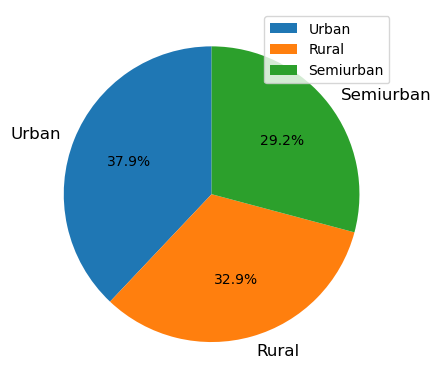

In [664]:
#Property_Area
value=loan_data['Property_Area'].value_counts()
print(value)
a=['Urban','Rural','Semiurban']
plt.pie(value , labels=a , autopct='%1.1f%%', startangle=90 )
plt.legend()
plt.show

In [665]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


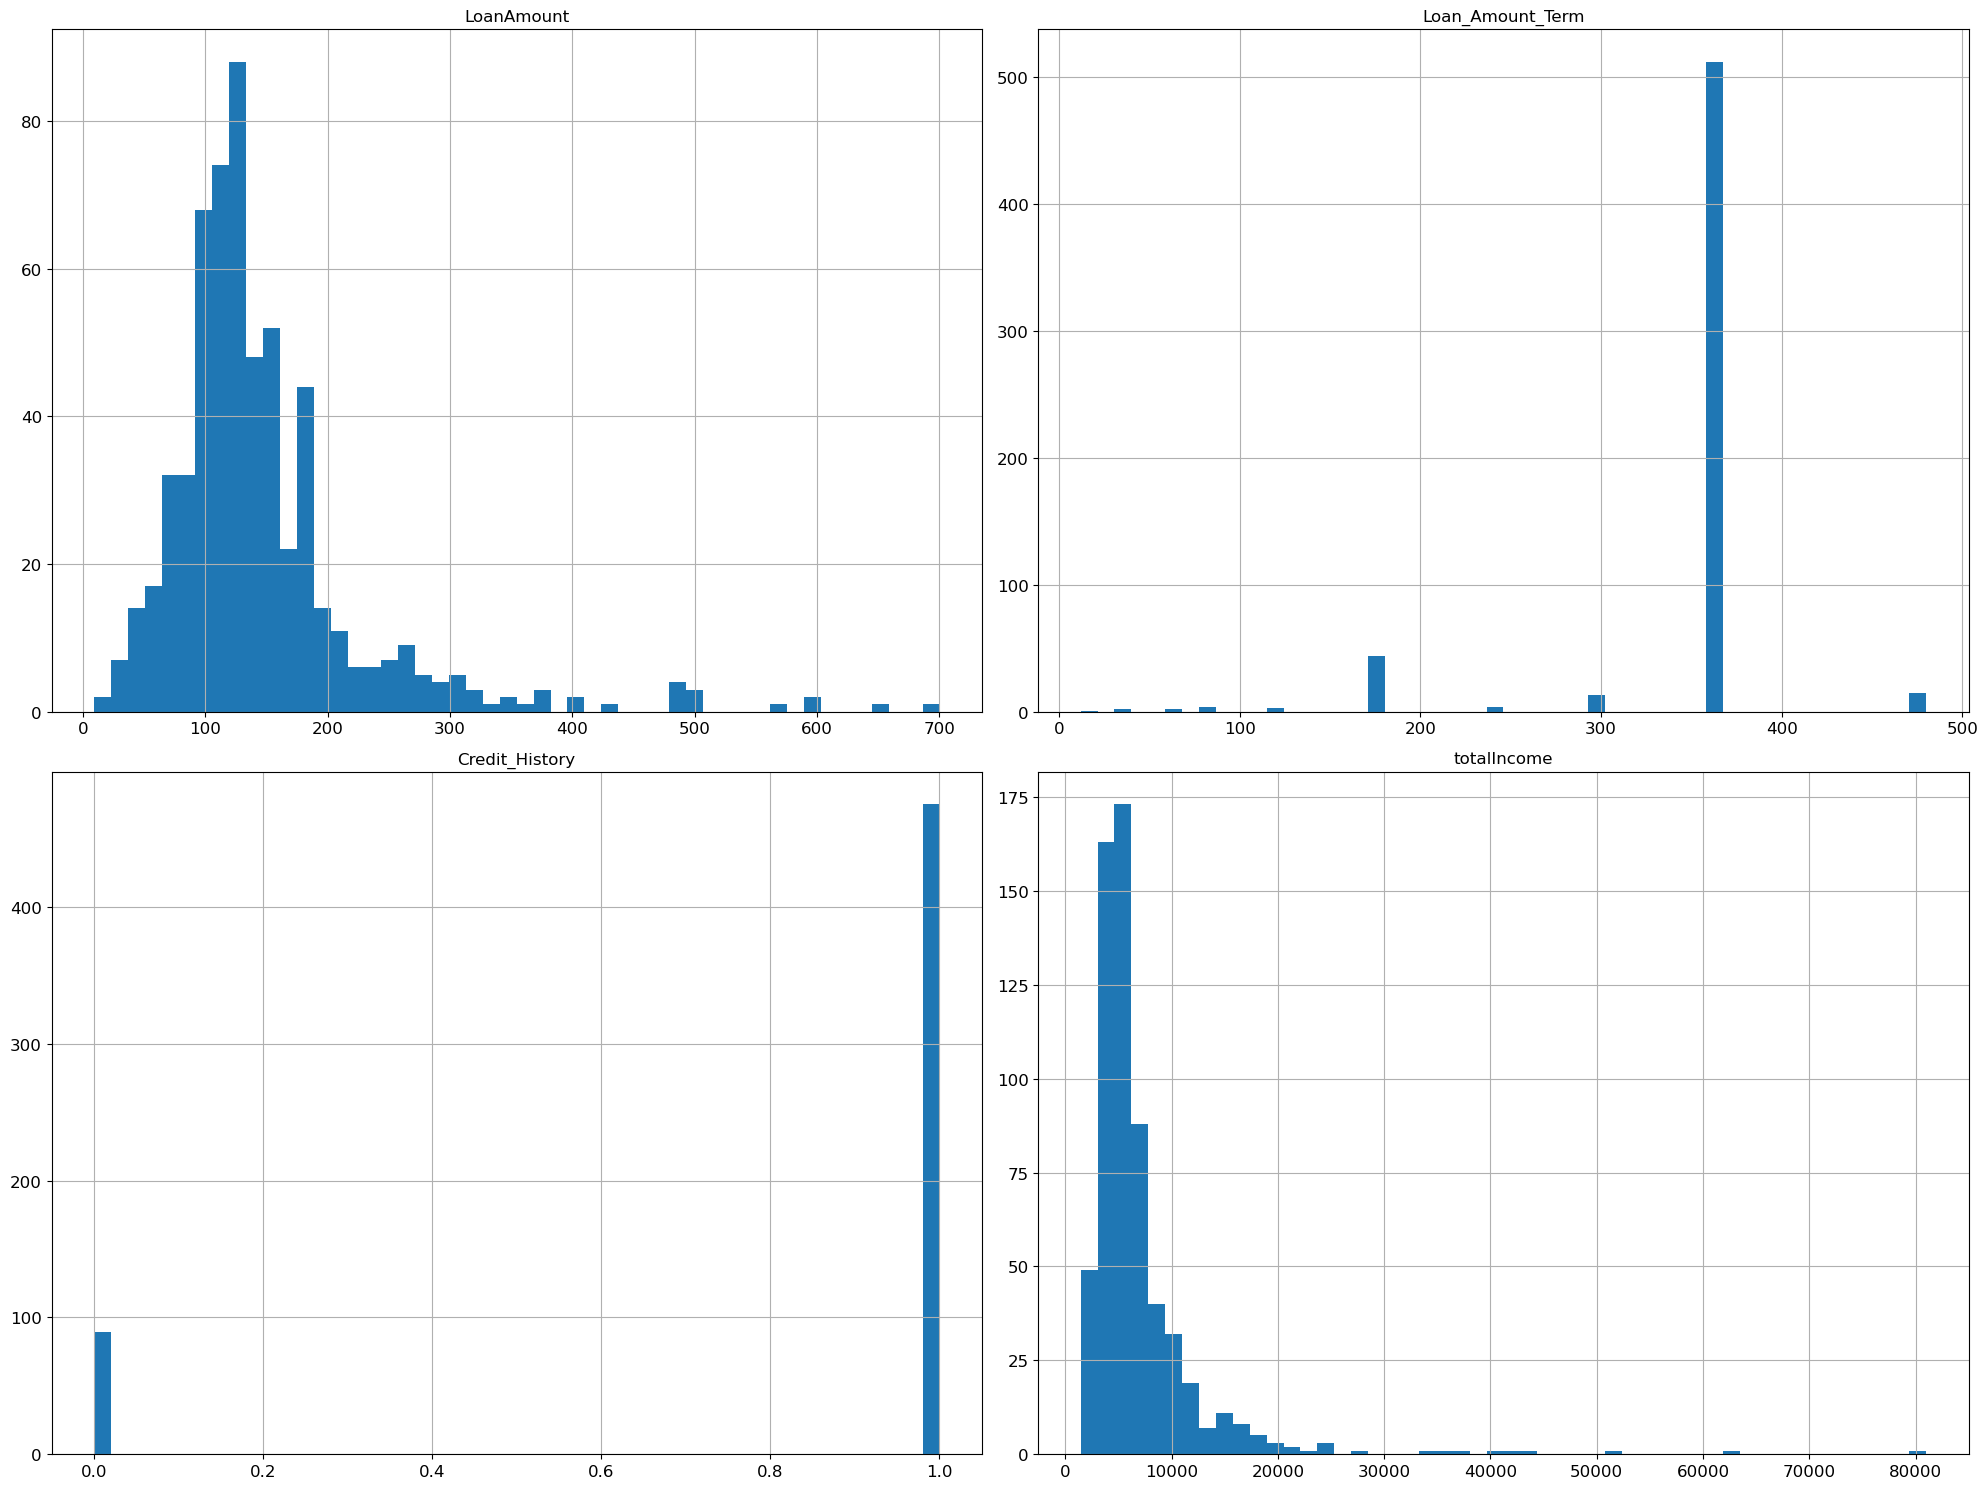

In [666]:
%matplotlib inline

loan_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [667]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [668]:
 
del loan_data['Loan_ID']
del loan_data['Gender']

In [669]:
loan_data

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


# Handling missing values

In [670]:
loan_data.isnull().sum()

Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
totalIncome          0
dtype: int64

## Here we fill the non-numeric values with mode() value and fill the numeric values with mean() value

In [671]:

loan_data["Married"].fillna(loan_data["Married"].mode()[0],inplace=True)
loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0],inplace=True)
loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0],inplace=True)


In [672]:

loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean(),inplace=True)
loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean(),inplace=True)
loan_data["Credit_History"].fillna(loan_data["Credit_History"].mean(),inplace=True)

In [673]:
loan_data.isnull().sum()

Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
totalIncome         0
dtype: int64

## We do encoding of the data by get_dummies that Convert categorical variables into dummy/indicator variables. since most of the data have only two values (married/not married) get_dummies converts the columns into separate columns like the column for married_yes that has 1 for the married rows and zero for the others . then we can delet one of the column and keep one with values of 1 for married and 0 for not 

In [674]:
#Encoding Categorical Data
loan_data=pd.get_dummies(loan_data)  

loan_data=loan_data.drop(columns=["Married_No","Education_Not Graduate","Self_Employed_No","Loan_Status_N"],axis=1)
loan_data.head()

,LoanAmount,Loan_Amount_Term,Credit_History,totalIncome,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,146.412162,360.0,1.0,5849.0,0,1,0,0,0,1,0,0,0,1,1
1,128.000000,360.0,1.0,6091.0,1,0,1,0,0,1,0,1,0,0,0
2,66.000000,360.0,1.0,3000.0,1,1,0,0,0,1,1,0,0,1,1
3,120.000000,360.0,1.0,4941.0,1,1,0,0,0,0,0,0,0,1,1
4,141.000000,360.0,1.0,6000.0,0,1,0,0,0,1,0,0,0,1,1


In [675]:
loan_data

,LoanAmount,Loan_Amount_Term,Credit_History,totalIncome,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,146.412162,360.0,1.0,5849.0,0,1,0,0,0,1,0,0,0,1,1
1,128.000000,360.0,1.0,6091.0,1,0,1,0,0,1,0,1,0,0,0
2,66.000000,360.0,1.0,3000.0,1,1,0,0,0,1,1,0,0,1,1
3,120.000000,360.0,1.0,4941.0,1,1,0,0,0,0,0,0,0,1,1
4,141.000000,360.0,1.0,6000.0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,2900.0,0,1,0,0,0,1,0,1,0,0,1
610,40.000000,180.0,1.0,4106.0,1,0,0,0,1,1,0,1,0,0,1
611,253.000000,360.0,1.0,8312.0,1,0,1,0,0,1,0,0,0,1,1
612,187.000000,360.0,1.0,7583.0,1,0,0,1,0,1,0,0,0,1,1


In [676]:
i=str(loan_data["Dependents_0"])
print("{}".format(loan_data["Dependents_0"],loan_data["Dependents_1"]))

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    0
611    0
612    0
613    1
Name: Dependents_0, Length: 614, dtype: uint8


## For dependents column that has 4 values the get_dummies convert it into 4 column so we will do some maneual encoding to keep it single column . here there is a priority so we will do it with real meaning numbers 

We tried to handel the warning by using iloc but that is did not work 

In [678]:
for i in range(0,614) :
    if loan_data["Dependents_2"][i]==1:
        loan_data["Dependents_2"][i]=2
        
for i in range(0,614) :
    if loan_data["Dependents_3+"][i]==1:
        loan_data["Dependents_3+"][i]=3
        
for i in range(0,614) :
    if loan_data["Property_Area_Semiurban"][i]==1:
        loan_data["Property_Area_Semiurban"][i]=2
        
for i in range(0,614) :
    if loan_data["Property_Area_Urban"][i]==1:
        loan_data["Property_Area_Urban"][i]=3

## Same as the dependents column but here the is no priority so will do encoding with real meaning numbers

In [618]:
loan_data["Area"] = (loan_data["Property_Area_Rural"]+loan_data["Property_Area_Urban"]+ loan_data["Property_Area_Semiurban"])
loan_data["Dependents"] = (loan_data["Dependents_1"]+loan_data["Dependents_2"]+ loan_data["Dependents_3+"])
loan_data=loan_data.drop(columns=["Dependents_0","Dependents_1","Dependents_3+","Dependents_2",'Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban'],axis=1)
loan_data

,LoanAmount,Loan_Amount_Term,Credit_History,totalIncome,Married_Yes,Education_Graduate,Self_Employed_Yes,Loan_Status_Y,Area,Dependents
0,146.412162,360.0,1.0,5849.0,0,1,0,1,3,0
1,128.000000,360.0,1.0,6091.0,1,1,0,0,1,1
2,66.000000,360.0,1.0,3000.0,1,1,1,1,3,0
3,120.000000,360.0,1.0,4941.0,1,0,0,1,3,0
4,141.000000,360.0,1.0,6000.0,0,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,2900.0,0,1,0,1,1,0
610,40.000000,180.0,1.0,4106.0,1,1,0,1,1,3
611,253.000000,360.0,1.0,8312.0,1,1,0,1,3,1
612,187.000000,360.0,1.0,7583.0,1,1,0,1,3,2


In [619]:
for i in range(0,614) :
    if loan_data["Area"][i]==1:
        loan_data["Area"].iloc[i]=1
    if loan_data["Area"][i]==2:
        loan_data["Area"].iloc[i]=11 
    if loan_data["Area"][i]==3:
        loan_data["Area"].iloc[i]=111

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11248\2604673387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["Area"].iloc[i]=111
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11248\2604673387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["Area"].iloc[i]=1
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11248\2604673387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [620]:
loan_data= loan_data.loc[:,['LoanAmount','Loan_Amount_Term','Credit_History','totalIncome','Married_Yes','Education_Graduate','Self_Employed_Yes','Area','Dependents','Loan_Status_Y']]

# The final update of the dataset

In [621]:
loan_data

,LoanAmount,Loan_Amount_Term,Credit_History,totalIncome,Married_Yes,Education_Graduate,Self_Employed_Yes,Area,Dependents,Loan_Status_Y
0,146.412162,360.0,1.0,5849.0,0,1,0,111,0,1
1,128.000000,360.0,1.0,6091.0,1,1,0,1,1,0
2,66.000000,360.0,1.0,3000.0,1,1,1,111,0,1
3,120.000000,360.0,1.0,4941.0,1,0,0,111,0,1
4,141.000000,360.0,1.0,6000.0,0,1,0,111,0,1
...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,2900.0,0,1,0,1,0,1
610,40.000000,180.0,1.0,4106.0,1,1,0,1,3,1
611,253.000000,360.0,1.0,8312.0,1,1,0,111,1,1
612,187.000000,360.0,1.0,7583.0,1,1,0,111,2,1


#  split the data 


In [622]:
y=loan_data['Loan_Status_Y']

x=loan_data.iloc[:,:-1]



## y Contains the label that what we going to predict ,
## x contains the feature that what we going to use to predict 

In [623]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)


 ## we split the x and y data into train and test data

In [624]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

## we used StandardScaler to scale the data ( that is important to be sure the Ml did not think one of data is more important than the other )

# calssification the dataset

## first classifier:C-Support Vector Classification

In [625]:
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(scaled_x_train , y_train)

SVC()

In [626]:
svc_clf_pre=svc_clf.predict(scaled_x_test)

In [627]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,svc_clf_pre)

array([[12, 19],
       [ 1, 91]], dtype=int64)

In [628]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , svc_clf_pre)

0.8373983739837398

In [629]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_test , svc_clf_pre)


0.8272727272727273

In [630]:
recall_score(y_test , svc_clf_pre)

0.9891304347826086

Confusion Matrix:


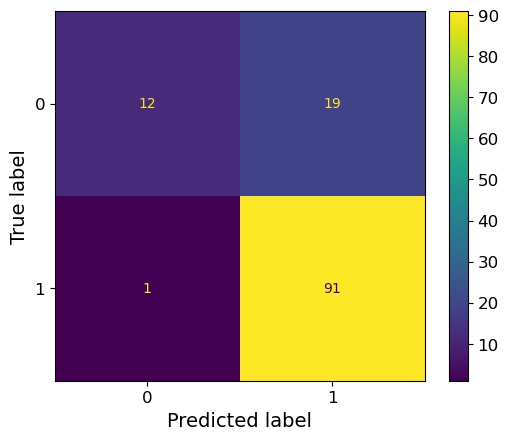

model 1 Testing Accuracy: 0.8373983739837398

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



In [631]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

print("Confusion Matrix:")
cm=confusion_matrix(y_test,svc_clf_pre)
cd=ConfusionMatrixDisplay(cm).plot()
cr=classification_report(y_test,svc_clf_pre)
plt.show()
ac=accuracy_score(y_test,svc_clf_pre)
print("model",1,"Testing Accuracy:",ac)
print("")
print("Classification Report:")
print("")
print(cr)

## doing pipeline to stack different steps that we will do one after another . the steps  : is fit the train data into the object classifier and print the accuracy & precision & recall  . we store these values in list to use it for doing some compares later 
## then doing plot for the Confusion Matrix with calssification report

In [632]:
accuracy, precision, recall = [], [], []
def model(classifier_object):
    
    classifier_object.fit(scaled_x_train,y_train)
    clf_pre=classifier_object.predict(scaled_x_test)
    print('the confusion matrix ' , confusion_matrix(y_test,clf_pre))
    print('accuracy =  ' ,accuracy_score(y_test , clf_pre)  )   
    print('precision = ' ,precision_score(y_test , clf_pre))
    print('recall =' ,recall_score(y_test , clf_pre))
    accuracy.append(accuracy_score(y_test , clf_pre))
    precision.append(precision_score(y_test , clf_pre))
    recall.append( recall_score(y_test , clf_pre))
    return clf_pre

In [633]:
def model_char(clf_pre , i):
    print("Confusion Matrix:")
    cm=confusion_matrix(y_test,clf_pre)
    cd=ConfusionMatrixDisplay(cm).plot()
    cr=classification_report(y_test,clf_pre)
    plt.show()
    ac=accuracy_score(y_test,clf_pre)
    print("model",i,"Testing Accuracy:",ac)
    print("")
    print("Classification Report:")
    print("")
    print(cr)

In [634]:
model(svc_clf)

the confusion matrix  [[12 19]
 [ 1 91]]
accuracy =   0.8373983739837398
precision =  0.8272727272727273
recall = 0.9891304347826086


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

## here we used the function for the first classifier just for store the accuracy and recall value 

# second  classifier : DecisionTree

In [635]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
tree_clf=model(dtree )

the confusion matrix  [[15 16]
 [24 68]]
accuracy =   0.6747967479674797
precision =  0.8095238095238095
recall = 0.7391304347826086


Confusion Matrix:


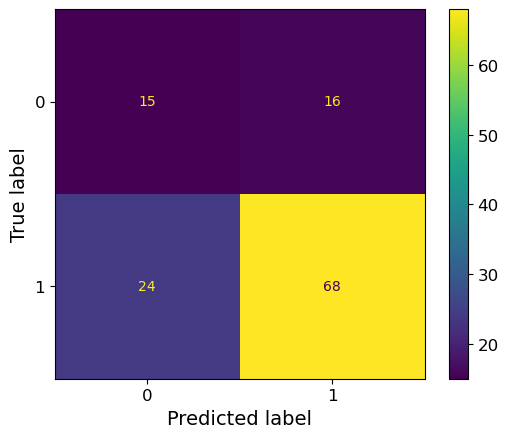

model 2 Testing Accuracy: 0.6747967479674797

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.48      0.43        31
           1       0.81      0.74      0.77        92

    accuracy                           0.67       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.70      0.67      0.69       123



In [636]:
model_char(tree_clf , 2)

# 3- RandomForest Classifier

In [637]:
RF = RandomForestClassifier()
RF_clf=model(RF)

the confusion matrix  [[13 18]
 [ 6 86]]
accuracy =   0.8048780487804879
precision =  0.8269230769230769
recall = 0.9347826086956522


Confusion Matrix:


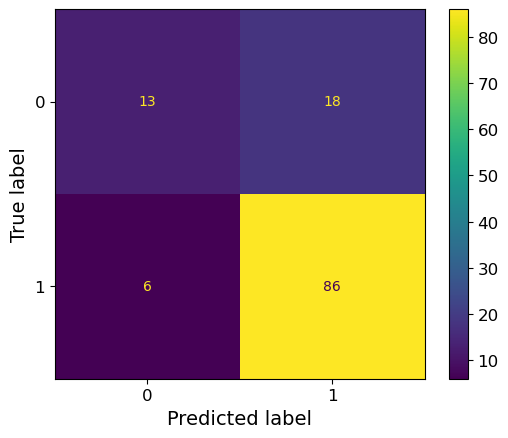

model 3 Testing Accuracy: 0.8048780487804879

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.42      0.52        31
           1       0.83      0.93      0.88        92

    accuracy                           0.80       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.79      0.80      0.79       123



In [638]:
model_char(RF_clf , 3)

# 4-XGB Classifier

In [639]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB_clf=model(XGB)

the confusion matrix  [[16 15]
 [15 77]]
accuracy =   0.7560975609756098
precision =  0.8369565217391305
recall = 0.8369565217391305


Confusion Matrix:


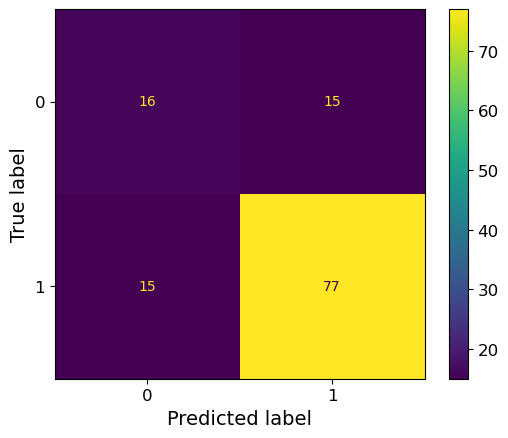

model 4 Testing Accuracy: 0.7560975609756098

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        31
           1       0.84      0.84      0.84        92

    accuracy                           0.76       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.76      0.76      0.76       123



In [640]:
model_char(XGB_clf , 4)

# 5-Logistic Regression

In [641]:
LR = LogisticRegression()
LR_clf=model(LR)

the confusion matrix  [[12 19]
 [ 1 91]]
accuracy =   0.8373983739837398
precision =  0.8272727272727273
recall = 0.9891304347826086


Confusion Matrix:


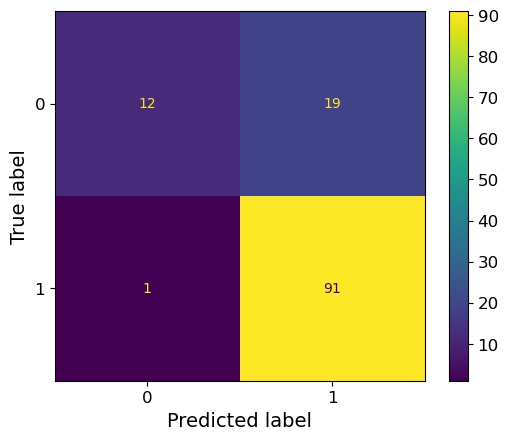

model 5 Testing Accuracy: 0.8373983739837398

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



In [642]:
model_char(LR_clf , 5)

# comparing all used classifiers for the loan  dataset

In [643]:
import pandas as pd

loan_data_model = pd.DataFrame(index=['SVC','decisionTree','RandomForest','XGBoost','LogisticRegression'], columns=['Accuracy', 'Precision', 'Recall'])
loan_data_model['Accuracy'] = accuracy
loan_data_model['Precision'] = precision
loan_data_model['Recall'] = recall

loan_data_model

,Accuracy,Precision,Recall
SVC,0.837398,0.827273,0.989130
decisionTree,0.674797,0.809524,0.739130
RandomForest,0.804878,0.826923,0.934783
XGBoost,0.756098,0.836957,0.836957
LogisticRegression,0.837398,0.827273,0.989130


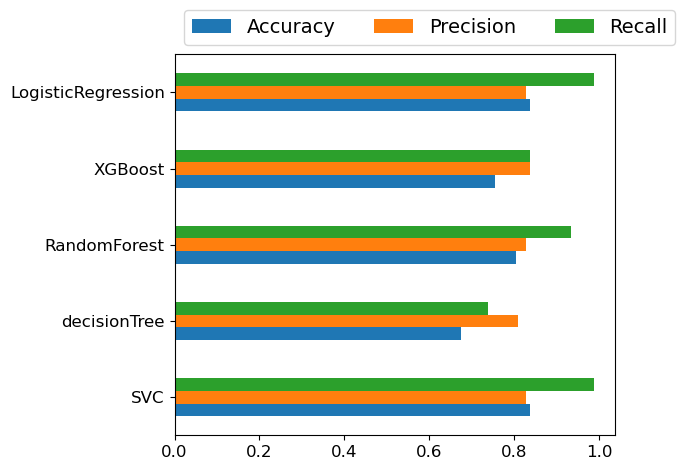

In [644]:
ax = loan_data_model.plot.barh()
ax.legend(
    ncol=5, 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [684]:
loan_data_model.Accuracy.max()

0.8373983739837398

# Conclusion

In [689]:
max=loan_data_model.Accuracy.idxmax()
print(max , 'is the most accurate classifier ')

SVC is the most accurate classifier 
